In [1]:
#Karan Veer Singh
#Internship Task 2
#Cognifyz Tech

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Dataset .csv')
print(df.shape)
df.head()

(9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
print(df['Price range'].value_counts().sort_index())
print(df['Rating color'].unique())

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64
['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


In [3]:
pr_dist=df['Price range'].value_counts().sort_index()
mc=pr_dist.idxmax()
print(mc)

1


In [4]:
avg_pr=df.groupby('Price range')['Aggregate rating'].mean().round(2)
print(avg_pr)

Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [5]:
bp=avg_pr.idxmax()
bv=avg_pr.max()
print(bp,bv)

4 3.82


In [6]:
color_pr=df.groupby('Price range').apply(lambda x:x.loc[x['Aggregate rating'].idxmax(),'Rating color'])
print(color_pr)
bc=color_pr.loc[bp]
print(bc)

Price range
1    Dark Green
2    Dark Green
3    Dark Green
4    Dark Green
dtype: object
Dark Green


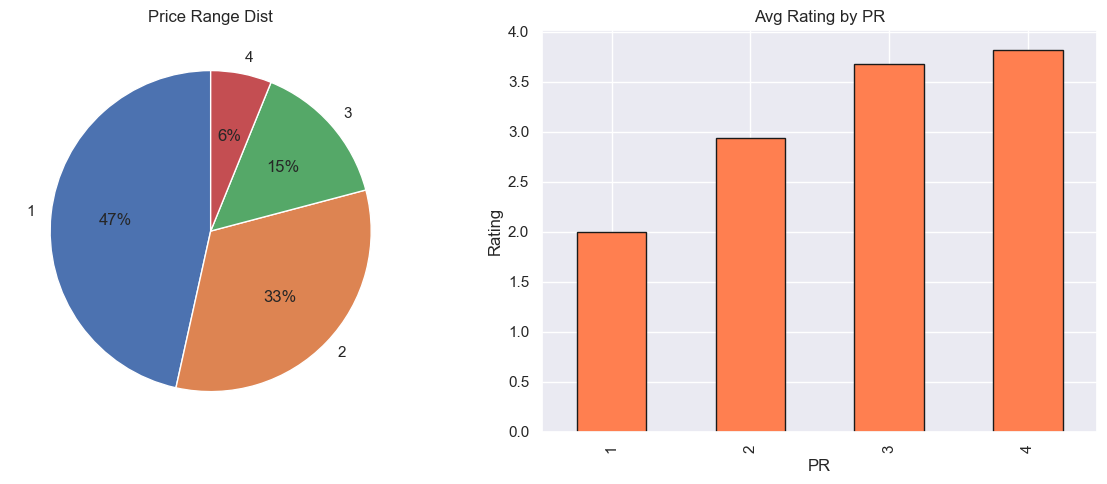

In [8]:
sns.set()
fig,axes=plt.subplots(1,2,figsize=(12,5))
axes[0].pie(pr_dist,labels=pr_dist.index,autopct='%1.0f%%',startangle=90)
axes[0].set_title('Price Range Dist')
avg_pr.plot(kind='bar',ax=axes[1],color='coral',edgecolor='k')
axes[1].set_title('Avg Rating by PR')
axes[1].set_xlabel('PR')
axes[1].set_ylabel('Rating')
plt.tight_layout();plt.show()

In [9]:
print("Most common PR:",mc)
print("Avg ratings:",avg_pr.to_dict())
print("Best PR:",bp,bv)
print("Color:",bc)

Most common PR: 1
Avg ratings: {1: 2.0, 2: 2.94, 3: 3.68, 4: 3.82}
Best PR: 4 3.82
Color: Dark Green
